In [371]:
import numpy
from matplotlib import pyplot
import matplotlib
pyplot.rc('font', size = 14)

In [445]:
numpy.random.seed(1)
Dz = 2
Dx = 2
Du = 1
num_points = 100

beta = .04
sigma_x = .1
U = numpy.random.rand(Dz, Du)
U /= numpy.sum(U)
w = 1.2 * numpy.ones(Dz)
C = numpy.random.randn(Dx, Dz)
C /= numpy.sum(C, axis=0)

u_weight = lambda z: 2 * beta * numpy.cosh(numpy.dot(z,w))

t = numpy.linspace(0,.2 * numpy.pi, 100)
z = numpy.vstack([numpy.sin(9 * t), numpy.sin(10 * t)]).T
mu_x = numpy.dot(z, C)

z_vec = numpy.linspace(-1.1,1.1,num_points)
z_mesh = numpy.meshgrid(z_vec, z_vec)
z_range = numpy.vstack([z_mesh[0].flatten(), z_mesh[1].flatten()]).T

x_vec = numpy.linspace(-1.6,1.8,num_points)
x_mesh = numpy.meshgrid(x_vec, x_vec)
x_range = numpy.vstack([x_mesh[0].flatten(), x_mesh[1].flatten()]).T

diag_mat = u_weight(z_range).reshape((num_points, num_points))
diag_traj = u_weight(z)
covs = sigma_x ** 2 * numpy.eye(Dx) + diag_traj[:,None,None] * numpy.dot(U,U.T)[None]

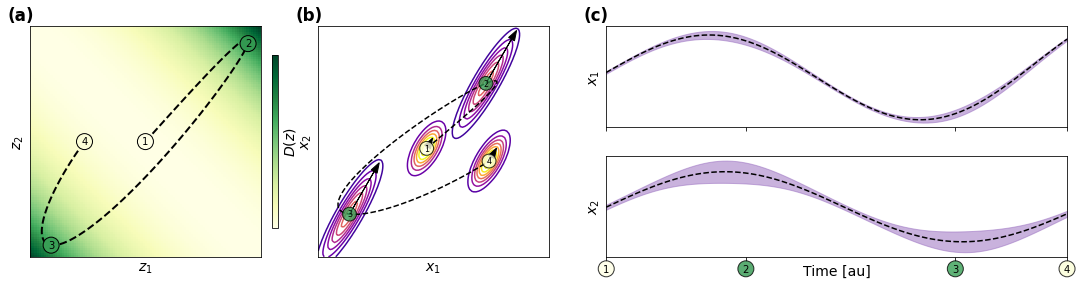

In [462]:
from matplotlib.transforms import IdentityTransform

def drawbb(bb, fig, **kwargs):
    r = plt.Circle((bb.x0, bb.y0), bb.width, bb.height, 
                      transform=IdentityTransform(), fill=True, **kwargs)
    fig.add_artist(r)

points_to_plot = [0,30,75,99]
fig = pyplot.figure(figsize=(16,4))
ax1 = fig.add_axes([.05,.1,.2,.8])
ax1.plot(z[:,0], z[:,1], lw=2, color='k', ls='--')
im = ax1.pcolor(z_vec, z_vec, diag_mat, shading='auto', cmap='YlGn', rasterized=True)
cmap = matplotlib.cm.get_cmap('YlGn')
for i, idx in enumerate(points_to_plot):
    arr_color = cmap((diag_traj[idx] - numpy.amin(diag_mat)) / (numpy.amax(diag_mat) - numpy.amin(diag_mat)))
    ax1.text(z[idx][0],z[idx][1], "%d" %(i+1), ha='center', va='center', size=10,
             bbox={"boxstyle" : "circle", "color":arr_color, "ec":'k'})
    
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('$z_1$')
ax1.set_ylabel('$z_2$')
ax1.set_title('(a)', loc='left', fontweight='bold', x=-.1)
cax = fig.add_axes([.26,.2,.005,.6])
pyplot.colorbar(im, label='$D(z)$', ticks=[], cax=cax)

ax2 = fig.add_axes([.3,.1,.2,.8])
ax2.plot(mu_x[:,0], mu_x[:,1], color='k', ls='--')
for i, idx in enumerate(points_to_plot):
    norm_dist = multivariate_normal(mean=mu_x[idx], cov=covs[idx])
    cdf = norm_dist.pdf(x_range).reshape((num_points, num_points))
    ax2.contour(x_vec, x_vec, cdf, vmin=0, vmax=5, cmap='plasma')
    arr_color = cmap((diag_traj[idx] - numpy.amin(diag_mat)) / (numpy.amax(diag_mat) - numpy.amin(diag_mat)))
    ax2.arrow(mu_x[idx][0], mu_x[idx][1], 3. * diag_traj[idx] * U[0][0], 3. * diag_traj[idx] * U[1][0], head_width=.1, 
              length_includes_head=True, color='k', zorder=10)
    ax2.text(mu_x[idx][0],mu_x[idx][1], "%d" %(i+1), ha='center', va='center', size=8,
             bbox={"boxstyle" : "circle", "color":arr_color, "alpha":.8, "ec":'k'}, zorder=11)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('(b)', loc='left', fontweight='bold', x=-.1)

ax3 = fig.add_axes([.55,.55,.4,.35])
ax3.plot(t, mu_x[:,0], 'k--')
ax3.fill_between(t, mu_x[:,0] - 1.68 * covs[:,0,0], mu_x[:,0] + 1.68 * covs[:,0,0], alpha=.5, color='C4')
ax3.set_ylabel('$x_1$')
ax3.set_xlim((t[0], t[-1]))
ax3.set_xticks(t[points_to_plot])
ax3.set_xticklabels([])
ax3.set_yticks([])
ax3.set_title('(c)', loc='left', fontweight='bold', x=-.05)
ax4 = fig.add_axes([.55,.1,.4,.35])
ax4.plot(t, mu_x[:,1], 'k--')
ax4.fill_between(t, mu_x[:,1] - 1.68 * covs[:,1,1], mu_x[:,1] + 1.68 * covs[:,1,1], alpha=.5, color='C4')
ax4.set_ylabel('$x_2$')
ax4.set_xlabel('Time [au]', labelpad=-10)
ax4.set_xlim((t[0], t[-1]))
ax4.set_xticks(t[points_to_plot])
boxes = []
ax4.set_xticklabels(numpy.arange(1,5), size=10)
ax4.set_yticks([])
for i, idx in enumerate(points_to_plot):
    arr_color = cmap((diag_traj[idx] - numpy.amin(diag_mat)) / (numpy.amax(diag_mat) - numpy.amin(diag_mat)))
    ax4.get_xticklabels()[i].set_bbox({"boxstyle" : "circle", "color":arr_color, "alpha":.8, "ec":'k'})
#fig.tight_layout()
fig.savefig('../../figs/aistats22/model_viz.pdf')
fig.savefig('../../figs/aistats22/model_viz.png', dpi=600)

In [419]:
{"boxstyle" : "circle", "color":arr_color, "alpha":.8, "ec":'k'}

SyntaxError: invalid syntax (<ipython-input-419-b71835bd14ea>, line 1)

In [430]:
xlabel = ax4.get_xticklabels()[i]

In [432]:
xlabel